# imports e installs

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, root_mean_squared_error,mean_absolute_percentage_error
from sklearn.datasets import make_classification, make_regression, make_circles, make_moons
import warnings
warnings.filterwarnings('ignore')
import sys, os
sys.path.append(os.path.abspath('..'))
from pre_processamento.processamento_dados import processamento

In [2]:
%pip install keras_tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Guilherme\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Guilherme\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
base = processamento()

In [5]:
base.head()

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
DATETIME                                                
2010-01-01 00:00:00                               0.0   
2010-01-01 01:00:00                               0.0   
2010-01-01 02:00:00                               0.0   
2010-01-01 03:00:00                               0.0   
2010-01-01 04:00:00                               0.0   

                     PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
DATETIME                                                                     
2010-01-01 00:00:00                                             1011.0       
2010-01-01 01:00:00                                             1011.2       
2010-01-01 02:00:00                                             1011.1       
2010-01-01 03:00:00                                             1010.9       
2010-01-01 04:00:00                                             1010.2       

                     PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
DATETIME                                                               
2010-01-01 00:00:00                                           1011.1   
2010-01-01 01:00:00                                           1011.2   
2010-01-01 02:00:00                                           1011.3   
2010-01-01 03:00:00                                           1011.2   
2010-01-01 04:00:00                                           1011.0   

                     PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  \
DATETIME                                                                
2010-01-01 00:00:00                                            1010.5   
2010-01-01 01:00:00                                            1011.0   
2010-01-01 02:00:00                                            1011.1   
2010-01-01 03:00:00                                            1010.9   
2010-01-01 04:00:00                                            1010.2   

                     TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
DATETIME                                                            
2010-01-01 00:00:00                                          21.1   
2010-01-01 01:00:00                                          20.8   
2010-01-01 02:00:00                                          20.5   
2010-01-01 03:00:00                                          20.0   
2010-01-01 04:00:00                                          19.5   

                     TEMPERATURA DO PONTO DE ORVALHO (°C)  \
DATETIME                                                    
2010-01-01 00:00:00                                  14.9   
2010-01-01 01:00:00                                  14.7   
2010-01-01 02:00:00                                  14.7   
2010-01-01 03:00:00                                  14.5   
2010-01-01 04:00:00                                  14.5   

                     TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)  \
DATETIME                                                          
2010-01-01 00:00:00                                        21.6   
2010-01-01 01:00:00                                        21.1   
2010-01-01 02:00:00                                        20.8   
2010-01-01 03:00:00                                        20.5   
2010-01-01 04:00:00                                        20.0   

                     TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)  \
DATETIME                                                          
2010-01-01 00:00:00                                        21.1   
2010-01-01 01:00:00                                        20.8   
2010-01-01 02:00:00                                        20.4   
2010-01-01 03:00:00                                        20.0   
2010-01-01 04:00:00                                        19.5   

                     TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)  \
DATETIME                                                                
2010-01-01 00:00:00                                        

# Testes para ver os resultados com e sem o uso de variáveis exogenas

## treinando o modelo com o ano de 2010/2011 e testando com 2012 **sem variáveis exógenas**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Divisão do dataset em treino e teste
temp_treino_sem_exogena = base[base.index.year == 2010]
treino_sem_exogena = temp_treino_sem_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']
temp_validacao_sem_exogena = base[base.index.year == 2011]
validacao_sem_exogena = temp_validacao_sem_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

In [ ]:
# --- FUNÇÃO AUXILIAR PARA CRIAR O TEMPO CÍCLICO ---
def adicionar_tempo_ciclico(df):
    df_copy = df.copy()

    # Se o índice não for datetime, converta-o (descomente a linha abaixo se necessário)
    # df_copy.index = pd.to_datetime(df_copy.index)

    # 1. Transformação da HORA (Ciclo Diário)
    # Permite ao modelo aprender ciclo dia/noite
    df_copy['hora_sin'] = np.sin(2 * np.pi * df_copy.index.hour / 24)
    df_copy['hora_cos'] = np.cos(2 * np.pi * df_copy.index.hour / 24)

    # 2. Transformação do DIA DO ANO (Ciclo Anual - Substitui Mês e Dia)
    # Permite ao modelo aprender Verão/Inverno de forma contínua
    df_copy['dia_ano_sin'] = np.sin(2 * np.pi * df_copy.index.dayofyear / 365.25)
    df_copy['dia_ano_cos'] = np.cos(2 * np.pi * df_copy.index.dayofyear / 365.25)

    return df_copy

# 1. Aplicar a transformação nos DataFrames
temp_treino_sem_exogena_proc = adicionar_tempo_ciclico(temp_treino_sem_exogena)
temp_validacao_sem_exogena_proc = adicionar_tempo_ciclico(temp_validacao_sem_exogena)

# 2. Defina as colunas
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
# As novas colunas exógenas agora são matemáticas (Seno/Cosseno)
exog_columns = ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']

# 3. Extraia e escale APENAS a variável alvo (Temperatura)
# Variáveis exógenas (Sin/Cos) JÁ estão na escala correta (-1 a 1), não precisam de Scaler.
treino_target_sem_exogena = temp_treino_sem_exogena_proc[target_column].values.reshape(-1, 1)
val_target_sem_exogena = temp_validacao_sem_exogena_proc[target_column].values.reshape(-1, 1)

target_scaler_sem_exogena = StandardScaler()
treino_target_scaled_sem_exogena = target_scaler_sem_exogena.fit_transform(treino_target_sem_exogena)
val_target_scaled_sem_exogena = target_scaler_sem_exogena.transform(val_target_sem_exogena)

print("Shape do Alvo Treino:", treino_target_scaled_sem_exogena.shape)

Shape do Alvo Treino: (8760, 1)


In [ ]:
import numpy as np

# 1. Combinar Temperatura (Escalada) com Tempo (Seno/Cosseno)
# A estrutura será: [Temperatura, Hora_Sin, Hora_Cos, DiaAno_Sin, DiaAno_Cos]
# treino_combined_data = np.hstack((treino_target_scaled, treino_exog))
# val_combined_data = np.hstack((val_target_scaled, val_exog))

treino_combined_data_sem_exogena = treino_target_scaled_sem_exogena
val_combined_data_sem_exogena = val_target_scaled_sem_exogena

# 2. Verificar shapes
print("Shape final dos dados de treino:", treino_combined_data_sem_exogena.shape)
print("Shape final dos dados de validação:", val_combined_data_sem_exogena.shape)

# O resultado deve ter 5 colunas (1 alvo + 4 tempo)
print("Primeiras 5 linhas do treino:\n", treino_combined_data_sem_exogena[:5])

Shape final dos dados de treino: (8760, 1)
Shape final dos dados de validação: (8760, 1)
Primeiras 5 linhas do treino:
 [[ 0.2735459 ]
 [ 0.18621411]
 [ 0.13381503]
 [ 0.08141596]
 [-0.00591583]]


In [ ]:
import numpy as np

def create_multivariate_sequences(data, sequence_length):
    X, y = [], []
    # O loop para antes de estourar o array
    for i in range(len(data) - sequence_length):
        # X: Pega todas as colunas (Temp + Tempo) do passo atual até o tamanho da janela
        X.append(data[i:(i + sequence_length), :])

        # y: Pega APENAS a temperatura (coluna 0) do PRÓXIMO passo
        y.append(data[i + sequence_length, 0])

    return np.array(X), np.array(y)

sequence_length_sem_exogena = 12 # Renamed from sequence_length for clarity

# Criação das sequências
X_train_final_sem_exogena, y_train_final_sem_exogena = create_multivariate_sequences(treino_combined_data_sem_exogena, sequence_length_sem_exogena)
X_val_final_sem_exogena, y_val_final_sem_exogena = create_multivariate_sequences(val_combined_data_sem_exogena, sequence_length_sem_exogena)

print("Shape of X_train_final:", X_train_final_sem_exogena.shape) # Deve ser (N, sequence lenght, 1)
print("Shape of y_train_final:", y_train_final_sem_exogena.shape) # Deve ser (N,)
print("Shape of X_val_final:", X_val_final_sem_exogena.shape)
print("Shape of y_val_final:", y_val_final_sem_exogena.shape)

Shape of X_train_final: (8748, 12, 1)
Shape of y_train_final: (8748,)
Shape of X_val_final: (8748, 12, 1)
Shape of y_val_final: (8748,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

model_sem_exogena = Sequential()

# Input Shape será (24, 5)
# O modelo vai aprender: "Dada a temperatura E a hora das últimas 24h, qual a temp agora?"
model_sem_exogena.add(LSTM(units=64, activation='relu', return_sequences=False,
               input_shape=(X_train_final_sem_exogena.shape[1], X_train_final_sem_exogena.shape[2])))

model_sem_exogena.add(Dense(units=1)) # Saída: Previsão da Temperatura Escalonada

model_sem_exogena.compile(optimizer='adam', loss='mean_squared_error')

model_sem_exogena.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_sem_exogena = model_sem_exogena.fit(
    X_train_final_sem_exogena,
    y_train_final_sem_exogena,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_data=(X_val_final_sem_exogena, y_val_final_sem_exogena),
    callbacks=[early_stopping]
)

print("Treinamento concluído.")

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3482 - val_loss: 0.0296
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0263 - val_loss: 0.0273
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0221 - val_loss: 0.0204
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0213 - val_loss: 0.0212
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0212 - val_loss: 0.0226
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0190 - val_loss: 0.0184
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0192 - val_loss: 0.0184
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0180 - val_loss: 0.0185
Epoch 9/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0200 - val_loss: 0.0215
Epoch 10/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0179 - val_loss: 0.0181
Epoch 11/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0205 - val_loss: 0.0197
Epoch 12/100
274/274 ━━━━━━━━━

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MSE na Validação: 0.5430


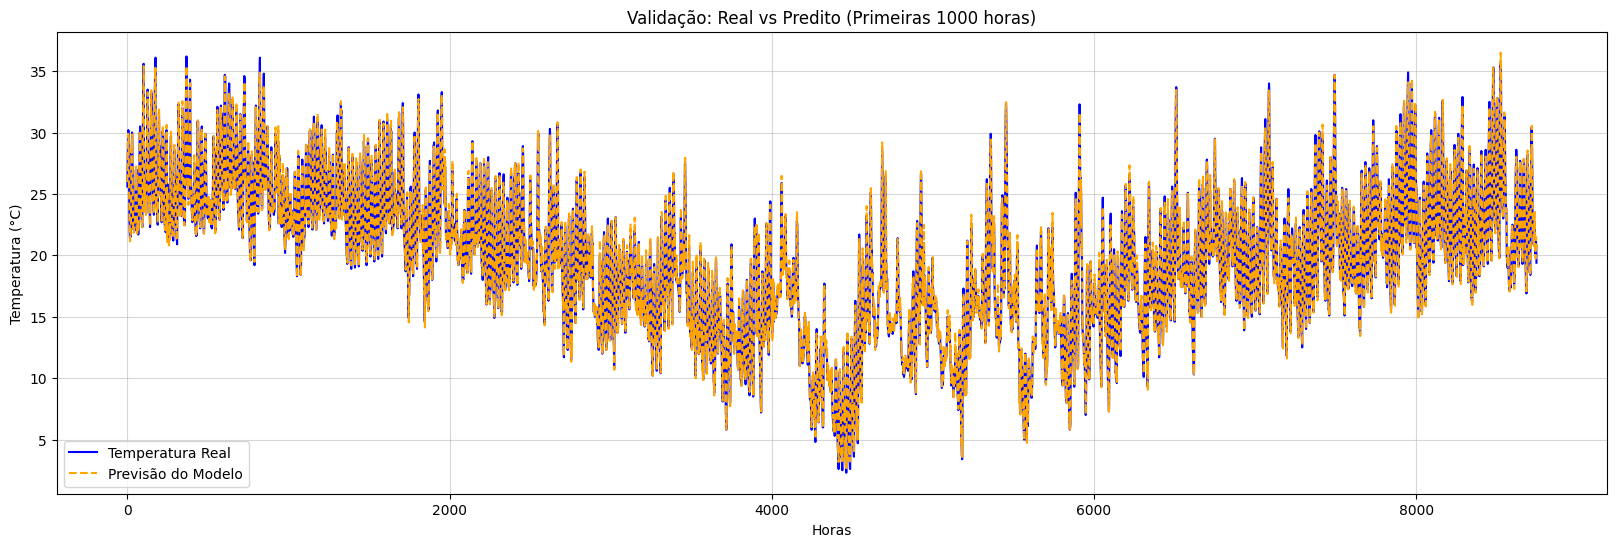

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. Previsão (O modelo cospe dados na escala normalizada)
predictions_scaled_sem_exogena = model_sem_exogena.predict(X_val_final_sem_exogena)

# 2. Desfazer a escala (Voltar para Graus Celsius)
# Usamos o target_scaler que treinamos lá no início
predictions_real_sem_exogena = target_scaler_sem_exogena.inverse_transform(predictions_scaled_sem_exogena)
y_val_real_sem_exogena = target_scaler_sem_exogena.inverse_transform(y_val_final_sem_exogena.reshape(-1, 1))

# 3. Calcular Erro
mse_sem_exogena_val = mean_squared_error(y_val_real_sem_exogena, predictions_real_sem_exogena)
print(f"MSE na Validação: {mse_sem_exogena_val:.4f}")

# 4. Plotagem (Zoom em 200 horas para ver os detalhes)
plt.figure(figsize=(20, 6))
# Vamos plotar apenas as primeiras 200 horas para facilitar a visualização do ciclo dia/noite
limit = 10000
plt.plot(y_val_real_sem_exogena[:limit], label='Temperatura Real', color='blue')
plt.plot(predictions_real_sem_exogena[:limit], label='Previsão do Modelo', color='orange', linestyle='--')

plt.title('Validação: Real vs Predito (Primeiras 1000 horas)')
plt.xlabel('Horas')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

### testando para o ano de 2012

In [ ]:
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
temp_teste_sem_exogena = base[base.index.year == 2012]
# 1. Extrair a variável alvo do novo dataset
# Precisamos dela para comparar se o modelo acertou depois (y_true)
teste_target_sem_exogena = temp_teste_sem_exogena[target_column].values.reshape(-1, 1)

# --- PONTO CRÍTICO DE SEGURANÇA ---
# Usamos .transform(), NÃO .fit_transform()
# Estamos dizendo: "Use a régua do treino para medir esses dados novos"
teste_target_scaled_sem_exogena = target_scaler_sem_exogena.transform(teste_target_sem_exogena)

# 3. Combinar (Target Escalado + Exógenas Cíclicas)
teste_combined_data_sem_exogena = teste_target_scaled_sem_exogena
print("Shape dos dados de teste prontos:", teste_combined_data_sem_exogena.shape)

Shape dos dados de teste prontos: (8784, 1)


In [ ]:
# 1. Criar as sequências (Janelas)
# Reutilizamos a função create_multivariate_sequences
X_teste_ext_sem_exogena, y_teste_ext_sem_exogena = create_multivariate_sequences(teste_combined_data_sem_exogena, sequence_length_sem_exogena)

print("Shape de entrada para o modelo:", X_teste_ext_sem_exogena.shape)

# 2. Fazer a Predição
predictions_ext_scaled_sem_exogena = model_sem_exogena.predict(X_teste_ext_sem_exogena)

# 3. Desfazer a escala para ver os graus Celsius reais
predictions_ext_real_sem_exogena = target_scaler_sem_exogena.inverse_transform(predictions_ext_scaled_sem_exogena)
y_teste_real_sem_exogena = target_scaler_sem_exogena.inverse_transform(y_teste_ext_sem_exogena.reshape(-1, 1))

Shape de entrada para o modelo: (8772, 12, 1)
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


mse : 0.61
Erro Médio Absoluto (MAE) no Novo Dataset: 0.53 °C
Isso significa que o modelo erra, em média, 0.53 graus para cima ou para baixo.


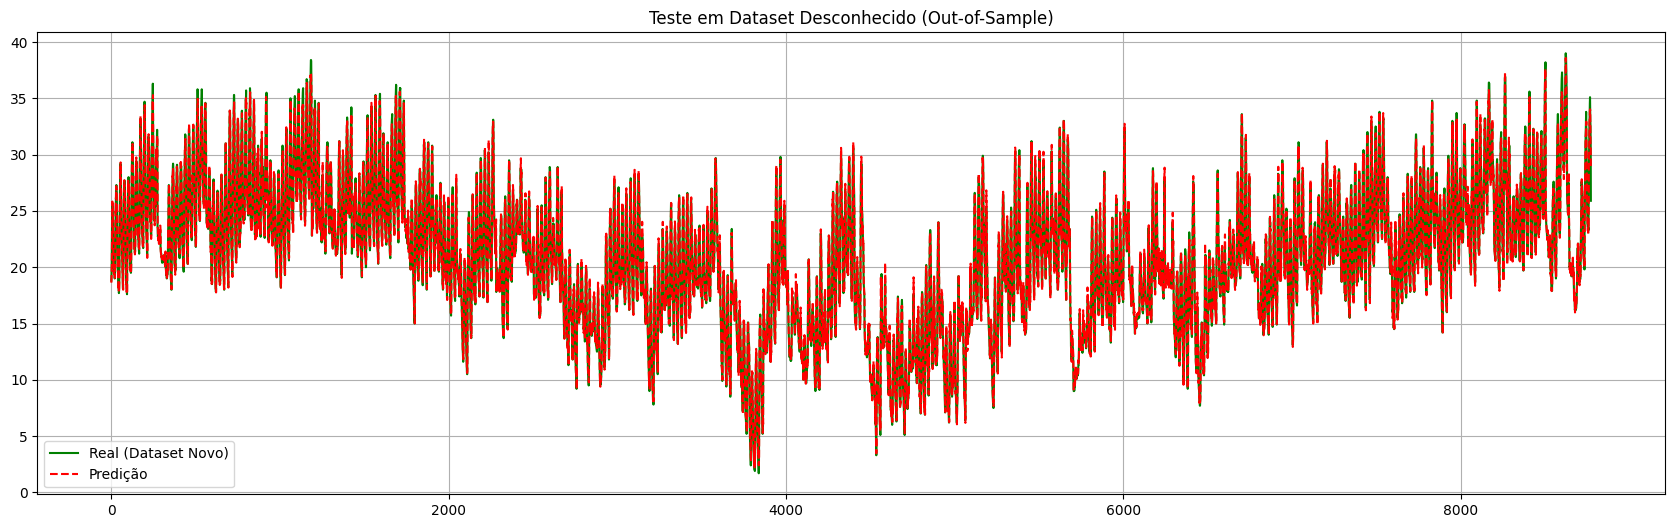

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular erros
mse_ext_sem_exogena = mean_squared_error(y_teste_real_sem_exogena, predictions_ext_real_sem_exogena)
mae_ext_sem_exogena = mean_absolute_error(y_teste_real_sem_exogena, predictions_ext_real_sem_exogena)
print(f"mse : {mse_ext_sem_exogena:.2f}")
print(f"Erro Médio Absoluto (MAE) no Novo Dataset: {mae_ext_sem_exogena:.2f} °C")
print(f"Isso significa que o modelo erra, em média, {mae_ext_sem_exogena:.2f} graus para cima ou para baixo.")

# Plotar um trecho
plt.figure(figsize=(21, 6))
limit = 10000 # Visualizar as primeiras 300 horas
plt.plot(y_teste_real_sem_exogena[:limit], label='Real (Dataset Novo)', color='green')
plt.plot(predictions_ext_real_sem_exogena[:limit], label='Predição', color='red', linestyle='--')
plt.title('Teste em Dataset Desconhecido (Out-of-Sample)')
plt.legend()
plt.grid(True)
plt.show()

Tamanho das Datas: 8772
Tamanho das Predições: 8772


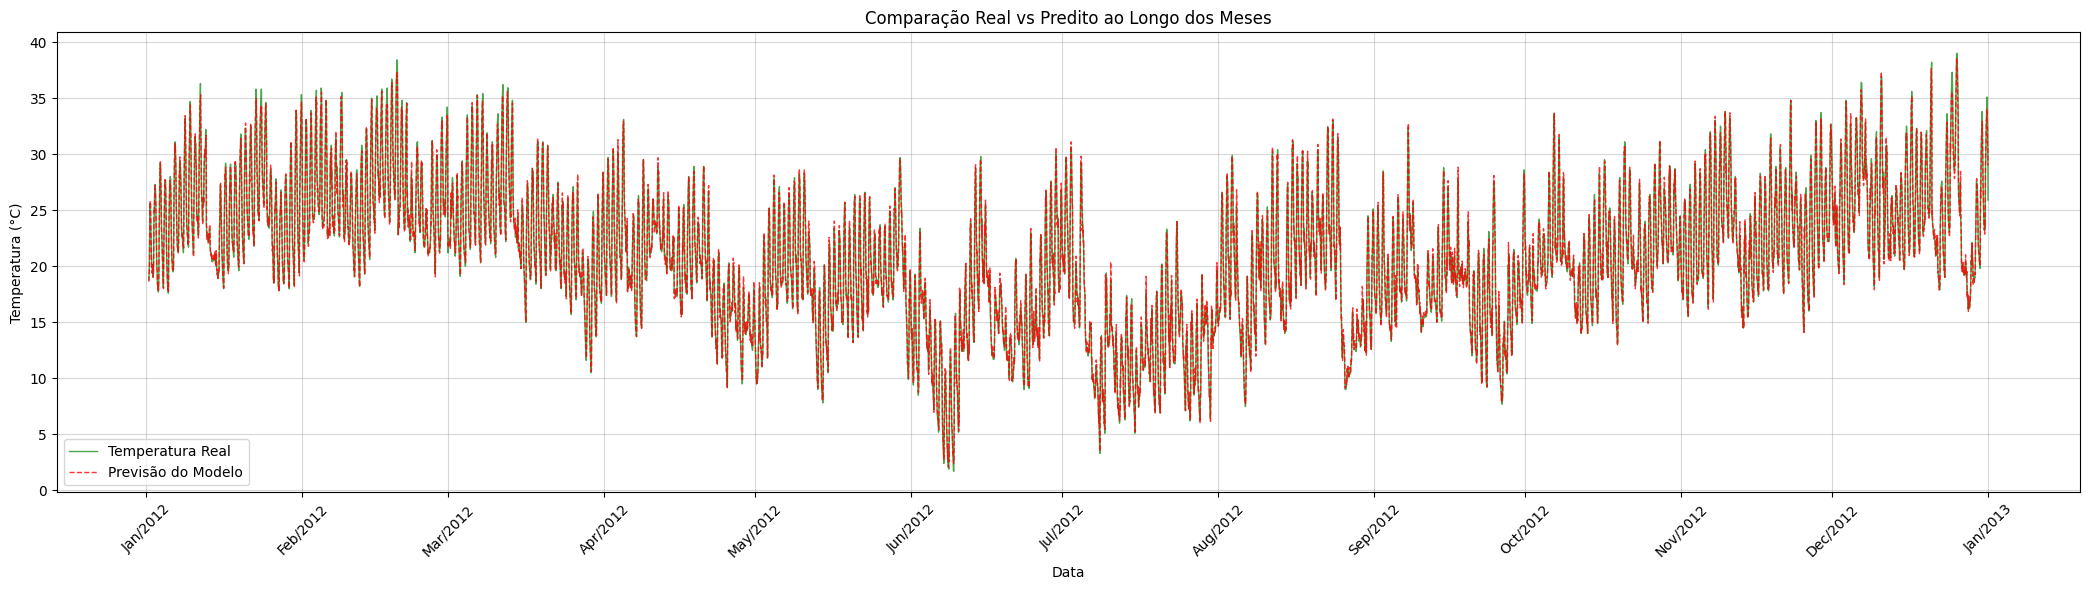

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. Recuperar as datas originais correspondentes às predições
# Lembre-se: O modelo "come" as primeiras X horas (sequence_length) para fazer a primeira predição.
# Então, as datas das predições começam a partir do índice [sequence_length] do dataframe original.

# Usar a sequence_length correta (que é a segunda dimensão de X_teste_ext)
prediction_sequence_length_sem_exogena = X_teste_ext_sem_exogena.shape[1]
datas_correspondentes_sem_exogena = temp_teste_sem_exogena.index[prediction_sequence_length_sem_exogena:]

# Vamos garantir que os tamanhos batem (segurança)
print(f"Tamanho das Datas: {len(datas_correspondentes_sem_exogena)}")
print(f"Tamanho das Predições: {len(predictions_ext_real_sem_exogena)}")

# 2. Criar um DataFrame temporário para facilitar a plotagem
df_resultado_sem_exogena = pd.DataFrame({
    'Real': y_teste_real_sem_exogena.flatten(),
    'Predito': predictions_ext_real_sem_exogena.flatten()
}, index=datas_correspondentes_sem_exogena)

# 3. Plotagem Formatada por Mês
fig, ax = plt.subplots(figsize=(21, 6))

ax.plot(df_resultado_sem_exogena.index, df_resultado_sem_exogena['Real'], label='Temperatura Real', color='green', linewidth=1, alpha=0.7)
ax.plot(df_resultado_sem_exogena.index, df_resultado_sem_exogena['Predito'], label='Previsão do Modelo', color='red', linewidth=1, alpha=0.8, linestyle='--')

# --- FORMATAÇÃO DO EIXO X (A Mágica acontece aqui) ---
# Define o formatador para mostrar o nome do mês (ex: Jan, Fev...)
ax.xaxis.set_major_locator(mdates.MonthLocator()) # Coloca um "tick" a cada mês
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y')) # Formato: "Jan/2022"

plt.title('Comparação Real vs Predito ao Longo dos Meses')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45) # Gira as datas para não encavalar
plt.tight_layout()
plt.show()

## treinando o modelo com o ano de 2010/2011 e testando com 2012 **com variáveis exógenas apenas DateTime**


In [ ]:
#Divisão do dataset em treino e teste
temp_treino_com_exogena = base[base.index.year == 2010]
treino_com_exogena = temp_treino_com_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']
temp_validacao_com_exogena = base[base.index.year == 2011]
validacao_com_exogena = temp_validacao_com_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- FUNÇÃO AUXILIAR PARA CRIAR O TEMPO CÍCLICO ---
def adicionar_tempo_ciclico(df):
    df_copy = df.copy()

    # Se o índice não for datetime, converta-o (descomente a linha abaixo se necessário)
    # df_copy.index = pd.to_datetime(df_copy.index)

    # 1. Transformação da HORA (Ciclo Diário)
    # Permite ao modelo aprender ciclo dia/noite
    df_copy['hora_sin'] = np.sin(2 * np.pi * df_copy.index.hour / 24)
    df_copy['hora_cos'] = np.cos(2 * np.pi * df_copy.index.hour / 24)

    # 2. Transformação do DIA DO ANO (Ciclo Anual - Substitui Mês e Dia)
    # Permite ao modelo aprender Verão/Inverno de forma contínua
    df_copy['dia_ano_sin'] = np.sin(2 * np.pi * df_copy.index.dayofyear / 365.25)
    df_copy['dia_ano_cos'] = np.cos(2 * np.pi * df_copy.index.dayofyear / 365.25)

    return df_copy

# 1. Aplicar a transformação nos DataFrames
temp_treino_com_exogena_proc = adicionar_tempo_ciclico(temp_treino_com_exogena)
temp_validacao_com_exogena_proc = adicionar_tempo_ciclico(temp_validacao_com_exogena)

# 2. Defina as colunas
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
# As novas colunas exógenas agora são matemáticas (Seno/Cosseno)
exog_columns = ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']

# 3. Extraia e escale APENAS a variável alvo (Temperatura)
# Variáveis exógenas (Sin/Cos) JÁ estão na escala correta (-1 a 1), não precisam de Scaler.
treino_target_com_exogena = temp_treino_com_exogena_proc[target_column].values.reshape(-1, 1)
val_target_com_exogena = temp_validacao_com_exogena_proc[target_column].values.reshape(-1, 1)

target_scaler_com_exogena = StandardScaler()
treino_target_scaled_com_exogena = target_scaler_com_exogena.fit_transform(treino_target_com_exogena)
val_target_scaled_com_exogena = target_scaler_com_exogena.transform(val_target_com_exogena)

# 4. Extraia as variáveis exógenas (sem aplicar StandardScaler nelas)
treino_exog = temp_treino_com_exogena_proc[exog_columns].values
val_exog = temp_validacao_com_exogena_proc[exog_columns].values

print("Shape do Alvo Treino:", treino_target_scaled_com_exogena.shape)
print("Shape das Exógenas Treino:", treino_exog.shape)
print("Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos):\n", treino_exog[:2])

Shape do Alvo Treino: (8760, 1)
Shape das Exógenas Treino: (8760, 4)
Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos):
 [[0.         1.         0.01720158 0.99985204]
 [0.25881905 0.96592583 0.01720158 0.99985204]]


In [ ]:
import numpy as np

# 1. Combinar Temperatura (Escalada) com Tempo (Seno/Cosseno)
# A estrutura será: [Temperatura, Hora_Sin, Hora_Cos, DiaAno_Sin, DiaAno_Cos]
treino_combined_data_com_exogena = np.hstack((treino_target_scaled_com_exogena, treino_exog))
val_combined_data_com_exogena = np.hstack((val_target_scaled_com_exogena, val_exog))

# treino_combined_data = treino_target_scaled
# val_combined_data = val_target_scaled

# 2. Verificar shapes
print("Shape final dos dados de treino:", treino_combined_data_com_exogena.shape)
print("Shape final dos dados de validação:", val_combined_data_com_exogena.shape)

# O resultado deve ter 5 colunas (1 alvo + 4 tempo)
print("Primeiras 5 linhas do treino:\n", treino_combined_data_com_exogena[:5])

Shape final dos dados de treino: (8760, 5)
Shape final dos dados de validação: (8760, 5)
Primeiras 5 linhas do treino:
 [[ 0.2735459   0.          1.          0.01720158  0.99985204]
 [ 0.18621411  0.25881905  0.96592583  0.01720158  0.99985204]
 [ 0.13381503  0.5         0.8660254   0.01720158  0.99985204]
 [ 0.08141596  0.70710678  0.70710678  0.01720158  0.99985204]
 [-0.00591583  0.8660254   0.5         0.01720158  0.99985204]]


In [ ]:
import numpy as np

def create_multivariate_sequences(data, sequence_length):
    X, y = [], []
    # O loop para antes de estourar o array
    for i in range(len(data) - sequence_length):
        # X: Pega todas as colunas (Temp + Tempo) do passo atual até o tamanho da janela
        X.append(data[i:(i + sequence_length), :])

        # y: Pega APENAS a temperatura (coluna 0) do PRÓXIMO passo
        y.append(data[i + sequence_length, 0])

    return np.array(X), np.array(y)

sequence_length_com_exogena = 8

# Criação das sequências
X_train_final_com_exogena, y_train_final_com_exogena = create_multivariate_sequences(treino_combined_data_com_exogena, sequence_length_com_exogena)
X_val_final_com_exogena, y_val_final_com_exogena = create_multivariate_sequences(val_combined_data_com_exogena, sequence_length_com_exogena)

print("Shape of X_train_final:", X_train_final_com_exogena.shape) # Deve ser (N, sequence lenght, 1 ou 5)
print("Shape of y_train_final:", y_train_final_com_exogena.shape) # Deve ser (N,)
print("Shape of X_val_final:", X_val_final_com_exogena.shape)
print("Shape of y_val_final:", y_val_final_com_exogena.shape)

Shape of X_train_final: (8752, 8, 5)
Shape of y_train_final: (8752,)
Shape of X_val_final: (8752, 8, 5)
Shape of y_val_final: (8752,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

model_com_exogena = Sequential()

# Input Shape será (24, 5)
# O modelo vai aprender: "Dada a temperatura E a hora das últimas 24h, qual a temp agora?"
model_com_exogena.add(LSTM(units=64, activation='relu', return_sequences=False,
               input_shape=(X_train_final_com_exogena.shape[1], X_train_final_com_exogena.shape[2])))

model_com_exogena.add(Dense(units=1)) # Saída: Previsão da Temperatura Escalonada

model_com_exogena.compile(optimizer='adam', loss='mean_squared_error')

model_com_exogena.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,985 (70.25 KB)

 Trainable params: 17,985 (70.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_com_exogena = model_com_exogena.fit(
    X_train_final_com_exogena,
    y_train_final_com_exogena,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_data=(X_val_final_com_exogena, y_val_final_com_exogena),
    callbacks=[early_stopping]
)

print("Treinamento concluído.")

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1968 - val_loss: 0.0334
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0252 - val_loss: 0.0189
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0206 - val_loss: 0.0174
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0179 - val_loss: 0.0197
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0167 - val_loss: 0.0173
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0166 - val_loss: 0.0158
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0146 - val_loss: 0.0153
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0152 - val_loss: 0.0147
Epoch 9/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0140 - val_loss: 0.0147
Epoch 10/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0146 - val_loss: 0.0142
Epoch 11/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0140 - val_loss: 0.0140
Epoch 12/100
274/274 ━━━━━━━━━

274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
MSE na Validação: 0.4280


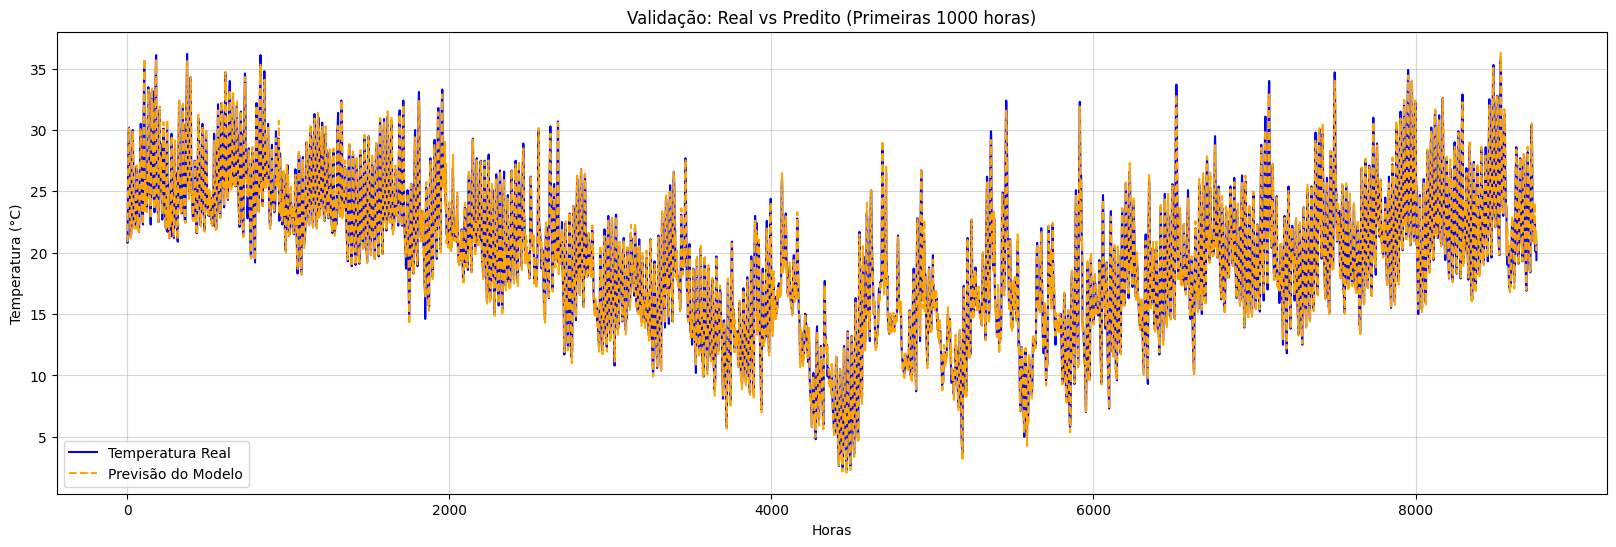

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. Previsão (O modelo cospe dados na escala normalizada)
predictions_scaled_com_exogena = model_com_exogena.predict(X_val_final_com_exogena)

# 2. Desfazer a escala (Voltar para Graus Celsius)
# Usamos o target_scaler que treinamos lá no início
predictions_real_com_exogena = target_scaler_com_exogena.inverse_transform(predictions_scaled_com_exogena)
y_val_real_com_exogena = target_scaler_com_exogena.inverse_transform(y_val_final_com_exogena.reshape(-1, 1))

# 3. Calcular Erro
mse_com_exogena_val = mean_squared_error(y_val_real_com_exogena, predictions_real_com_exogena)
print(f"MSE na Validação: {mse_com_exogena_val:.4f}")

# 4. Plotagem (Zoom em 200 horas para ver os detalhes)
plt.figure(figsize=(20, 6))
# Vamos plotar apenas as primeiras 200 horas para facilitar a visualização do ciclo dia/noite
limit = 10000
plt.plot(y_val_real_com_exogena[:limit], label='Temperatura Real', color='blue')
plt.plot(predictions_real_com_exogena[:limit], label='Previsão do Modelo', color='orange', linestyle='--')

plt.title('Validação: Real vs Predito (Primeiras 1000 horas)')
plt.xlabel('Horas')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

### testando para o ano de 2012

In [ ]:
# 2. Aplique EXATAMENTE a mesma função de engenharia de features usada no treino
# (A função adicionar_tempo_ciclico que criamos antes)
temp_teste_com_exogena = base[base.index.year == 2012]
temp_teste_com_exogena = adicionar_tempo_ciclico(temp_teste_com_exogena)

# 3. Defina as colunas (estas foram definidas em TPvT--6bxOIw, redefinindo para clareza)
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
exog_columns= ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']

# Verifique se não há NaNs (o shift ou cálculo pode gerar nulos nas pontas)
temp_teste_com_exogena = temp_teste_com_exogena.dropna()

In [ ]:
# 1. Extrair a variável alvo do novo dataset
# Precisamos dela para comparar se o modelo acertou depois (y_true)
teste_target_com_exogena = temp_teste_com_exogena[target_column].values.reshape(-1, 1)

# 2. Extrair as exógenas (Seno/Cosseno e físicas)
teste_exog_com_exogena = temp_teste_com_exogena[exog_columns].values
# --- PONTO CRÍTICO DE SEGURANÇA ---
# Usamos .transform(), NÃO .fit_transform()
# Estamos dizendo: "Use a régua do treino para medir esses dados novos"
teste_target_scaled_com_exogena = target_scaler_com_exogena.transform(teste_target_com_exogena)

# 3. Combinar (Target Escalado + Exógenas Cíclicas + Exógenas Físicas Escaladas)
teste_combined_data_com_exogena = np.hstack((teste_target_scaled_com_exogena, teste_exog_com_exogena))

print("Shape dos dados de teste prontos:", teste_combined_data_com_exogena.shape)

Shape dos dados de teste prontos: (8784, 5)


In [ ]:
# 1. Criar as sequências (Janelas)
# Reutilizamos a função create_multivariate_sequences
X_teste_ext_com_exogena, y_teste_ext_com_exogena = create_multivariate_sequences(teste_combined_data_com_exogena, sequence_length_com_exogena)

print("Shape de entrada para o modelo:", X_teste_ext_com_exogena.shape)

# 2. Fazer a Predição
predictions_ext_scaled_com_exogena = model_com_exogena.predict(X_teste_ext_com_exogena)

# 3. Desfazer a escala para ver os graus Celsius reais
predictions_ext_real_com_exogena = target_scaler_com_exogena.inverse_transform(predictions_ext_scaled_com_exogena)
y_teste_real_com_exogena = target_scaler_com_exogena.inverse_transform(y_teste_ext_com_exogena.reshape(-1, 1))

Shape de entrada para o modelo: (8776, 8, 5)
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


mse : 0.48
Erro Médio Absoluto (MAE) no Novo Dataset: 0.47 °C
Isso significa que o modelo erra, em média, 0.47 graus para cima ou para baixo.


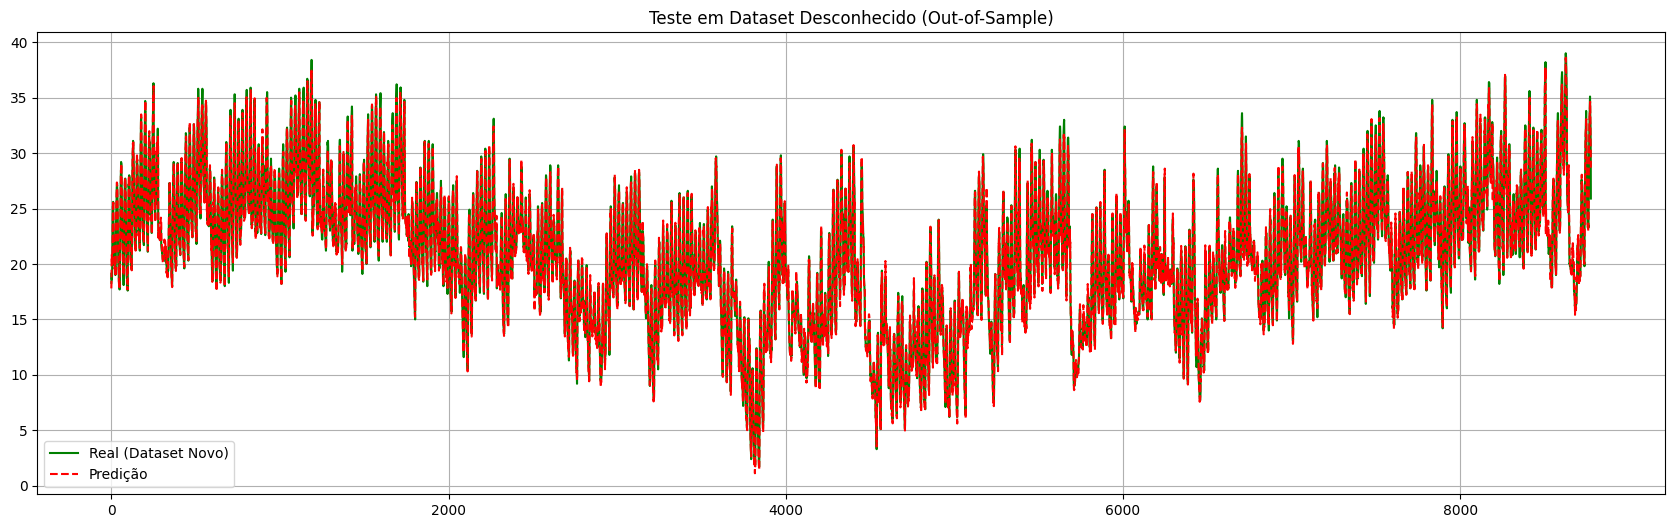

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular erros
mse_ext_com_exogena = mean_squared_error(y_teste_real_com_exogena, predictions_ext_real_com_exogena)
mae_ext_com_exogena = mean_absolute_error(y_teste_real_com_exogena, predictions_ext_real_com_exogena)
print(f"mse : {mse_ext_com_exogena:.2f}")
print(f"Erro Médio Absoluto (MAE) no Novo Dataset: {mae_ext_com_exogena:.2f} °C")
print(f"Isso significa que o modelo erra, em média, {mae_ext_com_exogena:.2f} graus para cima ou para baixo.")

# Plotar um trecho
plt.figure(figsize=(21, 6))
limit = 10000 # Visualizar as primeiras 300 horas
plt.plot(y_teste_real_com_exogena[:limit], label='Real (Dataset Novo)', color='green')
plt.plot(predictions_ext_real_com_exogena[:limit], label='Predição', color='red', linestyle='--')
plt.title('Teste em Dataset Desconhecido (Out-of-Sample)')
plt.legend()
plt.grid(True)
plt.show()

Tamanho das Datas: 8776
Tamanho das Predições: 8776


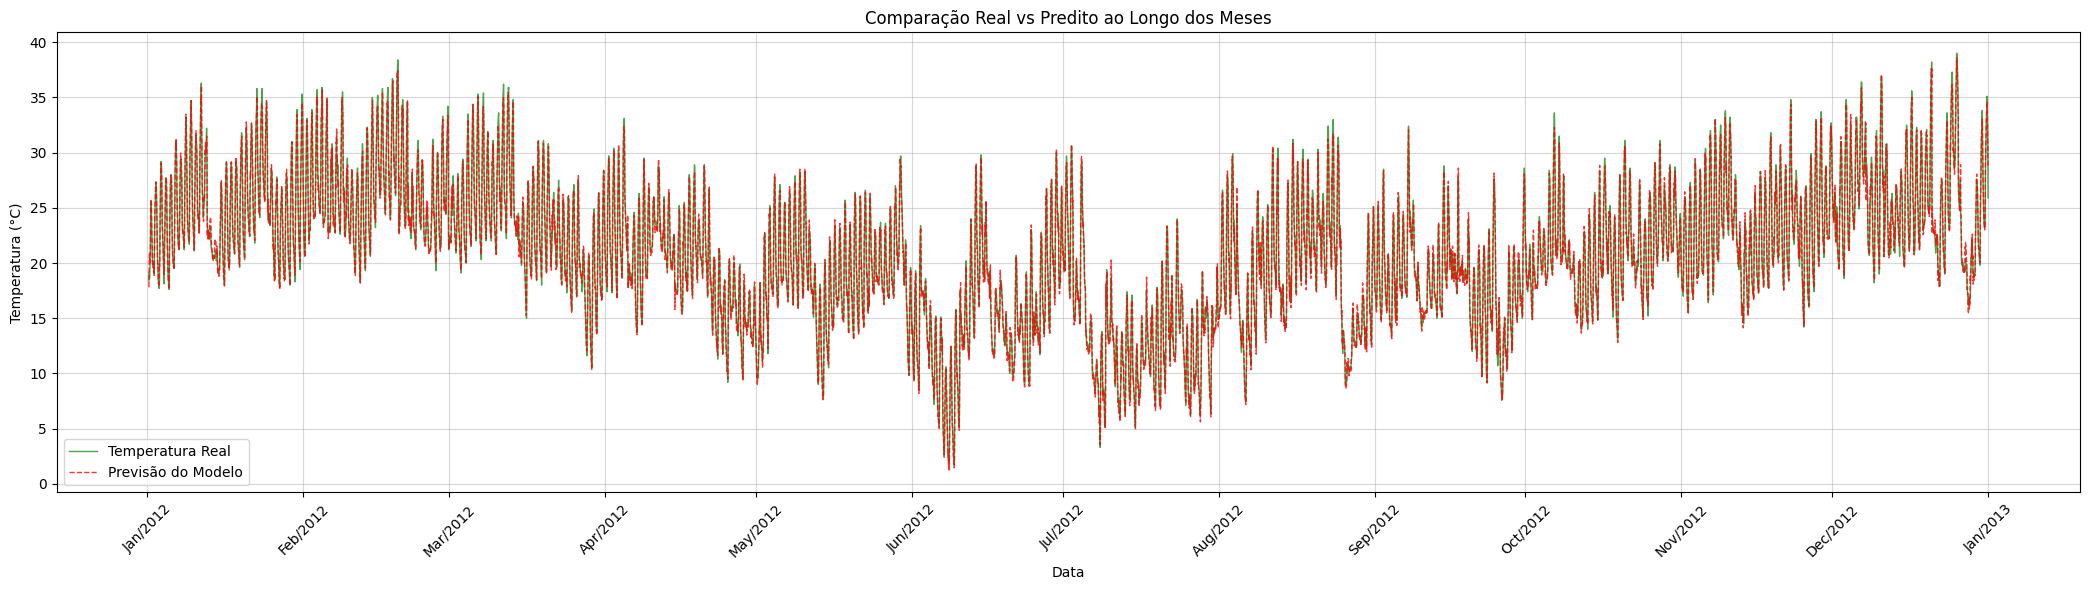

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. Recuperar as datas originais correspondentes às predições
# Lembre-se: O modelo "come" as primeiras X horas (sequence_length) para fazer a primeira predição.
# Então, as datas das predições começam a partir do índice [sequence_length] do dataframe original.

# Usar a sequence_length correta (que é a segunda dimensão de X_teste_ext)
prediction_sequence_length_com_exogena = X_teste_ext_com_exogena.shape[1]
datas_correspondentes_com_exogena = temp_teste_com_exogena.index[prediction_sequence_length_com_exogena:]

# Vamos garantir que os tamanhos batem (segurança)
print(f"Tamanho das Datas: {len(datas_correspondentes_com_exogena)}")
print(f"Tamanho das Predições: {len(predictions_ext_real_com_exogena)}")

# 2. Criar um DataFrame temporário para facilitar a plotagem
df_resultado_com_exogena = pd.DataFrame({
    'Real': y_teste_real_com_exogena.flatten(),
    'Predito': predictions_ext_real_com_exogena.flatten()
}, index=datas_correspondentes_com_exogena)

# 3. Plotagem Formatada por Mês
fig, ax = plt.subplots(figsize=(21, 6))

ax.plot(df_resultado_com_exogena.index, df_resultado_com_exogena['Real'], label='Temperatura Real', color='green', linewidth=1, alpha=0.7)
ax.plot(df_resultado_com_exogena.index, df_resultado_com_exogena['Predito'], label='Previsão do Modelo', color='red', linewidth=1, alpha=0.8, linestyle='--')

# --- FORMATAÇÃO DO EIXO X (A Mágica acontece aqui) ---
# Define o formatador para mostrar o nome do mês (ex: Jan, Fev...)
ax.xaxis.set_major_locator(mdates.MonthLocator()) # Coloca um "tick" a cada mês
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y')) # Formato: "Jan/2022"

plt.title('Comparação Real vs Predito ao Longo dos Meses')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45) # Gira as datas para não encavalar
plt.tight_layout()
plt.show()

## treinando o modelo com o ano de 2010/2011 e testando com 2012 **com variáveis exógenas DateTime e físicas**

In [ ]:
#Divisão do dataset em treino e teste
temp_treino_multi_exogena = base[base.index.year == 2010]
treino_multi_exogena = temp_treino_multi_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']
temp_validacao_multi_exogena = base[base.index.year == 2011]
validacao_multi_exogena = temp_validacao_multi_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- FUNÇÃO AUXILIAR PARA CRIAR O TEMPO CÍCLICO ---
def adicionar_tempo_ciclico(df):
    df_copy = df.copy()

    # Se o índice não for datetime, converta-o (descomente a linha abaixo se necessário)
    # df_copy.index = pd.to_datetime(df_copy.index)

    # 1. Transformação da HORA (Ciclo Diário)
    # Permite ao modelo aprender ciclo dia/noite
    df_copy['hora_sin'] = np.sin(2 * np.pi * df_copy.index.hour / 24)
    df_copy['hora_cos'] = np.cos(2 * np.pi * df_copy.index.hour / 24)

    # 2. Transformação do DIA DO ANO (Ciclo Anual - Substitui Mês e Dia)
    # Permite ao modelo aprender Verão/Inverno de forma contínua
    df_copy['dia_ano_sin'] = np.sin(2 * np.pi * df_copy.index.dayofyear / 365.25)
    df_copy['dia_ano_cos'] = np.cos(2 * np.pi * df_copy.index.dayofyear / 365.25)

    return df_copy

# 1. Aplicar a transformação nos DataFrames
temp_treino_multi_exogena_proc = adicionar_tempo_ciclico(temp_treino_multi_exogena)
temp_validacao_multi_exogena_proc = adicionar_tempo_ciclico(temp_validacao_multi_exogena)

# 2. Defina as colunas
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'

exog_columns_datetime = ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']
exog_columns_fisicas = [
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, RAJADA MAXIMA (m/s)'
]

# 3. Extraia e escale APENAS a variável alvo (Temperatura)
treino_target_multi_exogena = temp_treino_multi_exogena_proc[target_column].values.reshape(-1, 1)
val_target_multi_exogena = temp_validacao_multi_exogena_proc[target_column].values.reshape(-1, 1)

target_scaler_multi_exogena = StandardScaler()
treino_target_scaled_multi_exogena = target_scaler_multi_exogena.fit_transform(treino_target_multi_exogena)
val_target_scaled_multi_exogena = target_scaler_multi_exogena.transform(val_target_multi_exogena)

# 4. Extraia as variáveis exógenas
treino_exog_datetime = temp_treino_multi_exogena_proc[exog_columns_datetime].values
val_exog_datetime = temp_validacao_multi_exogena_proc[exog_columns_datetime].values

treino_exog_fisicas = temp_treino_multi_exogena_proc[exog_columns_fisicas].values
val_exog_fisicas = temp_validacao_multi_exogena_proc[exog_columns_fisicas].values

# Scale the fisicas exogenous variables
fisicas_exog_scaler = StandardScaler()
treino_exog_fisicas_scaled = fisicas_exog_scaler.fit_transform(treino_exog_fisicas)
val_exog_fisicas_scaled = fisicas_exog_scaler.transform(val_exog_fisicas)

# Combine all scaled/prepared exogenous features
treino_multi_exogena = np.hstack((treino_exog_datetime, treino_exog_fisicas_scaled))
val_multi_exogena = np.hstack((val_exog_datetime, val_exog_fisicas_scaled))

print("Shape do Alvo Treino:", treino_target_scaled_multi_exogena.shape)
print("Shape das Exógenas Treino:", treino_multi_exogena.shape)
print("Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos, Físicas Escalonadas):\n", treino_multi_exogena[:2])

Shape do Alvo Treino: (8760, 1)
Shape das Exógenas Treino: (8760, 7)
Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos, Físicas Escalonadas):
 [[ 0.          1.          0.01720158  0.99985204  0.2219003  -0.51265948
   0.50632327]
 [ 0.25881905  0.96592583  0.01720158  0.99985204  0.25487144 -0.51265948
   0.73699887]]


In [ ]:
import numpy as np

# 1. Combinar Temperatura (Escalada) com Tempo (Seno/Cosseno) e Exógenas Físicas Escaladas
# A estrutura será: [Temperatura, Hora_Sin, Hora_Cos, DiaAno_Sin, DiaAno_Cos, P_ATM, UMIDADE, VENTO_RAJADA]
treino_combined_data_multi_exogena = np.hstack((treino_target_scaled_multi_exogena, treino_multi_exogena))
val_combined_data_multi_exogena = np.hstack((val_target_scaled_multi_exogena, val_multi_exogena))

# 2. Verificar shapes
print("Shape final dos dados de treino:", treino_combined_data_multi_exogena.shape)
print("Shape final dos dados de validação:", val_combined_data_multi_exogena.shape)

# O resultado deve ter 8 colunas (1 alvo + 4 tempo + 3 físicas)
print("Primeiras 5 linhas do treino:\n", treino_combined_data_multi_exogena[:5])

Shape final dos dados de treino: (8760, 8)
Shape final dos dados de validação: (8760, 8)
Primeiras 5 linhas do treino:
 [[ 0.2735459   0.          1.          0.01720158  0.99985204  0.2219003
  -0.51265948  0.50632327]
 [ 0.18621411  0.25881905  0.96592583  0.01720158  0.99985204  0.25487144
  -0.51265948  0.73699887]
 [ 0.13381503  0.5         0.8660254   0.01720158  0.99985204  0.23838587
  -0.38035441  0.69855293]
 [ 0.08141596  0.70710678  0.70710678  0.01720158  0.99985204  0.20541473
  -0.31420188  0.62166107]
 [-0.00591583  0.8660254   0.5         0.01720158  0.99985204  0.09001573
  -0.18189681  0.23720175]]


In [ ]:
import numpy as np

def create_multivariate_sequences(data, sequence_length):
    X, y = [], []
    # O loop para antes de estourar o array
    for i in range(len(data) - sequence_length):
        # X: Pega todas as colunas (Temp + Tempo) do passo atual até o tamanho da janela
        X.append(data[i:(i + sequence_length), :])

        # y: Pega APENAS a temperatura (coluna 0) do PRÓXIMO passo
        y.append(data[i + sequence_length, 0])

    return np.array(X), np.array(y)

sequence_length_multi_exogena = 8

# Criação das sequências
X_train_final_multi_exogena, y_train_final_multi_exogena = create_multivariate_sequences(treino_combined_data_multi_exogena, sequence_length_multi_exogena)
X_val_final_multi_exogena, y_val_final_multi_exogena = create_multivariate_sequences(val_combined_data_multi_exogena, sequence_length_multi_exogena)

print("Shape of X_train_final:", X_train_final_multi_exogena.shape) # Deve ser (N, sequence lenght, 1 ou 5)
print("Shape of y_train_final:", y_train_final_multi_exogena.shape) # Deve ser (N,)
print("Shape of X_val_final:", X_val_final_multi_exogena.shape)
print("Shape of y_val_final:", y_val_final_multi_exogena.shape)

Shape of X_train_final: (8752, 8, 8)
Shape of y_train_final: (8752,)
Shape of X_val_final: (8752, 8, 8)
Shape of y_val_final: (8752,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

model_multi_exogena = Sequential()

# Input Shape será (24, 5)
# O modelo vai aprender: "Dada a temperatura E a hora das últimas 24h, qual a temp agora?"
model_multi_exogena.add(LSTM(units=64, activation='relu', return_sequences=False,
               input_shape=(X_train_final_multi_exogena.shape[1], X_train_final_multi_exogena.shape[2])))

model_multi_exogena.add(Dense(units=1)) # Saída: Previsão da Temperatura Escalonada

model_multi_exogena.compile(optimizer='adam', loss='mean_squared_error')

model_multi_exogena.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 64)             │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,753 (73.25 KB)

 Trainable params: 18,753 (73.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_multi_exogena = model_multi_exogena.fit(
    X_train_final_multi_exogena,
    y_train_final_multi_exogena,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_data=(X_val_final_multi_exogena, y_val_final_multi_exogena),
    callbacks=[early_stopping]
)

print("Treinamento concluído.")

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1985 - val_loss: 0.0244
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0209 - val_loss: 0.0152
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0145 - val_loss: 0.0146
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0149 - val_loss: 0.0220
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0133 - val_loss: 0.0123
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0113 - val_loss: 0.0118
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0115 - val_loss: 0.0114
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0114 - val_loss: 0.0124
Epoch 9/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0108 - val_loss: 0.0123
Epoch 10/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0101 - val_loss: 0.0116
Epoch 11/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0101 - val_loss: 0.0109
Epoch 12/100
274/274 ━━━━━━━━━

274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
MSE na Validação: 0.3009


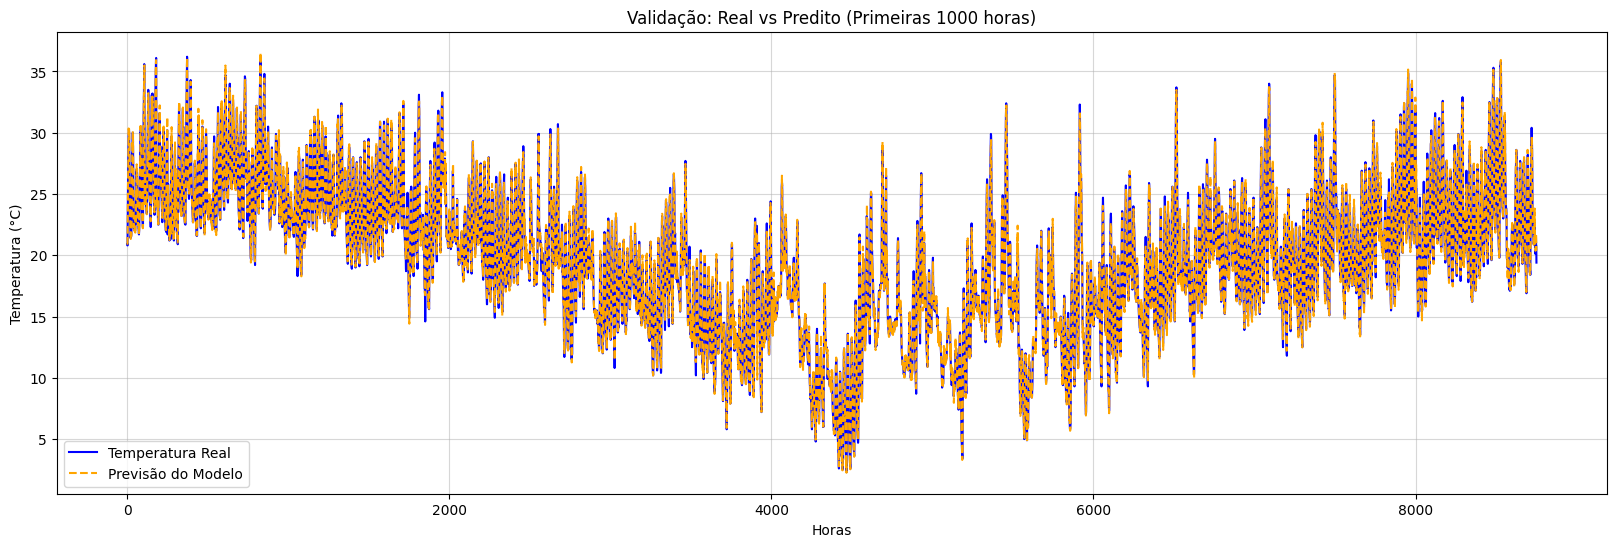

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. Previsão (O modelo cospe dados na escala normalizada)
predictions_scaled_multi_exogena = model_multi_exogena.predict(X_val_final_multi_exogena)

# 2. Desfazer a escala (Voltar para Graus Celsius)
# Usamos o target_scaler que treinamos lá no início
predictions_real_multi_exogena = target_scaler_multi_exogena.inverse_transform(predictions_scaled_multi_exogena)
y_val_real_multi_exogena = target_scaler_multi_exogena.inverse_transform(y_val_final_multi_exogena.reshape(-1, 1))

# 3. Calcular Erro
mse_multi_exogena_val = mean_squared_error(y_val_real_multi_exogena, predictions_real_multi_exogena)
print(f"MSE na Validação: {mse_multi_exogena_val:.4f}")

# 4. Plotagem (Zoom em 200 horas para ver os detalhes)
plt.figure(figsize=(20, 6))
# Vamos plotar apenas as primeiras 200 horas para facilitar a visualização do ciclo dia/noite
limit = 10000
plt.plot(y_val_real_multi_exogena[:limit], label='Temperatura Real', color='blue')
plt.plot(predictions_real_multi_exogena[:limit], label='Previsão do Modelo', color='orange', linestyle='--')

plt.title('Validação: Real vs Predito (Primeiras 1000 horas)')
plt.xlabel('Horas')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

### testando para o ano de 2012

In [ ]:
# 2. Aplique EXATAMENTE a mesma função de engenharia de features usada no treino
# (A função adicionar_tempo_ciclico que criamos antes)
temp_teste_multi_exogena = base[base.index.year == 2012]
temp_teste_multi_exogena = adicionar_tempo_ciclico(temp_teste_multi_exogena)

# 3. Selecione as mesmas colunas
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
exog_columns_datetime = ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']
exog_columns_fisicas = [
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, RAJADA MAXIMA (m/s)'
]

# Verifique se não há NaNs (o shift ou cálculo pode gerar nulos nas pontas)
temp_teste_multi_exogena = temp_teste_multi_exogena.dropna()

In [ ]:
# 1. Extrair a variável alvo do novo dataset
# Precisamos dela para comparar se o modelo acertou depois (y_true)
teste_target_multi_exogena = temp_teste_multi_exogena[target_column].values.reshape(-1, 1)

# 2. Extrair as exógenas (Seno/Cosseno)
teste_exog_datetime = temp_teste_multi_exogena[exog_columns_datetime].values
teste_exog_fisicas = temp_teste_multi_exogena[exog_columns_fisicas].values

teste_exog_fisicas_scaled = fisicas_exog_scaler.transform(teste_exog_fisicas)
teste_multi_exogena = np.hstack((teste_exog_datetime, teste_exog_fisicas_scaled))
# --- PONTO CRÍTICO DE SEGURANÇA ---
# Usamos .transform(), NÃO .fit_transform()
# Estamos dizendo: "Use a régua do treino para medir esses dados novos"
teste_target_scaled_multi_exogena = target_scaler_multi_exogena.transform(teste_target_multi_exogena)

# 3. Combinar (Target Escalado + Exógenas Cíclicas)
teste_combined_data_multi_exogena = np.hstack((teste_target_scaled_multi_exogena, teste_multi_exogena))
# teste_combined_data = teste_target_scaled
print("Shape dos dados de teste prontos:", teste_combined_data_multi_exogena.shape)

Shape dos dados de teste prontos: (8784, 8)


In [ ]:
# 1. Criar as sequências (Janelas)
# Reutilizamos a função create_multivariate_sequences
X_teste_ext_multi_exogena, y_teste_ext_multi_exogena = create_multivariate_sequences(teste_combined_data_multi_exogena, sequence_length_multi_exogena)

print("Shape de entrada para o modelo:", X_teste_ext_multi_exogena.shape)

# 2. Fazer a Predição
predictions_ext_scaled_multi_exogena = model_multi_exogena.predict(X_teste_ext_multi_exogena)

# 3. Desfazer a escala para ver os graus Celsius reais
predictions_ext_real_multi_exogena = target_scaler_multi_exogena.inverse_transform(predictions_ext_scaled_multi_exogena)
y_teste_real_multi_exogena = target_scaler_multi_exogena.inverse_transform(y_teste_ext_multi_exogena.reshape(-1, 1))

Shape de entrada para o modelo: (8776, 8, 8)
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


mse : 0.32
Erro Médio Absoluto (MAE) no Novo Dataset: 0.40 °C
Isso significa que o modelo erra, em média, 0.40 graus para cima ou para baixo.


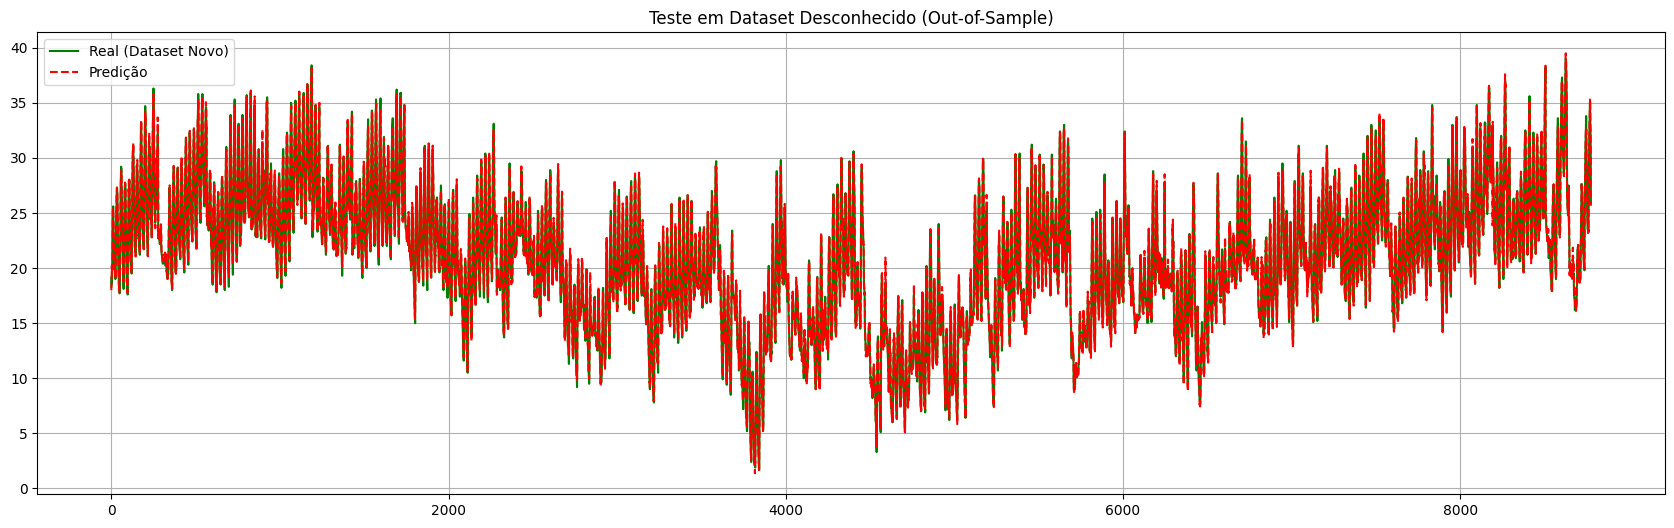

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular erros
mse_ext_multi_exogena = mean_squared_error(y_teste_real_multi_exogena, predictions_ext_real_multi_exogena)
mae_ext_multi_exogena = mean_absolute_error(y_teste_real_multi_exogena, predictions_ext_real_multi_exogena)
print(f"mse : {mse_ext_multi_exogena:.2f}")
print(f"Erro Médio Absoluto (MAE) no Novo Dataset: {mae_ext_multi_exogena:.2f} °C")
print(f"Isso significa que o modelo erra, em média, {mae_ext_multi_exogena:.2f} graus para cima ou para baixo.")

# Plotar um trecho
plt.figure(figsize=(21, 6))
limit = 10000 # Visualizar as primeiras 300 horas
plt.plot(y_teste_real_multi_exogena[:limit], label='Real (Dataset Novo)', color='green')
plt.plot(predictions_ext_real_multi_exogena[:limit], label='Predição', color='red', linestyle='--')
plt.title('Teste em Dataset Desconhecido (Out-of-Sample)')
plt.legend()
plt.grid(True)
plt.show()

Tamanho das Datas: 8776
Tamanho das Predições: 8776


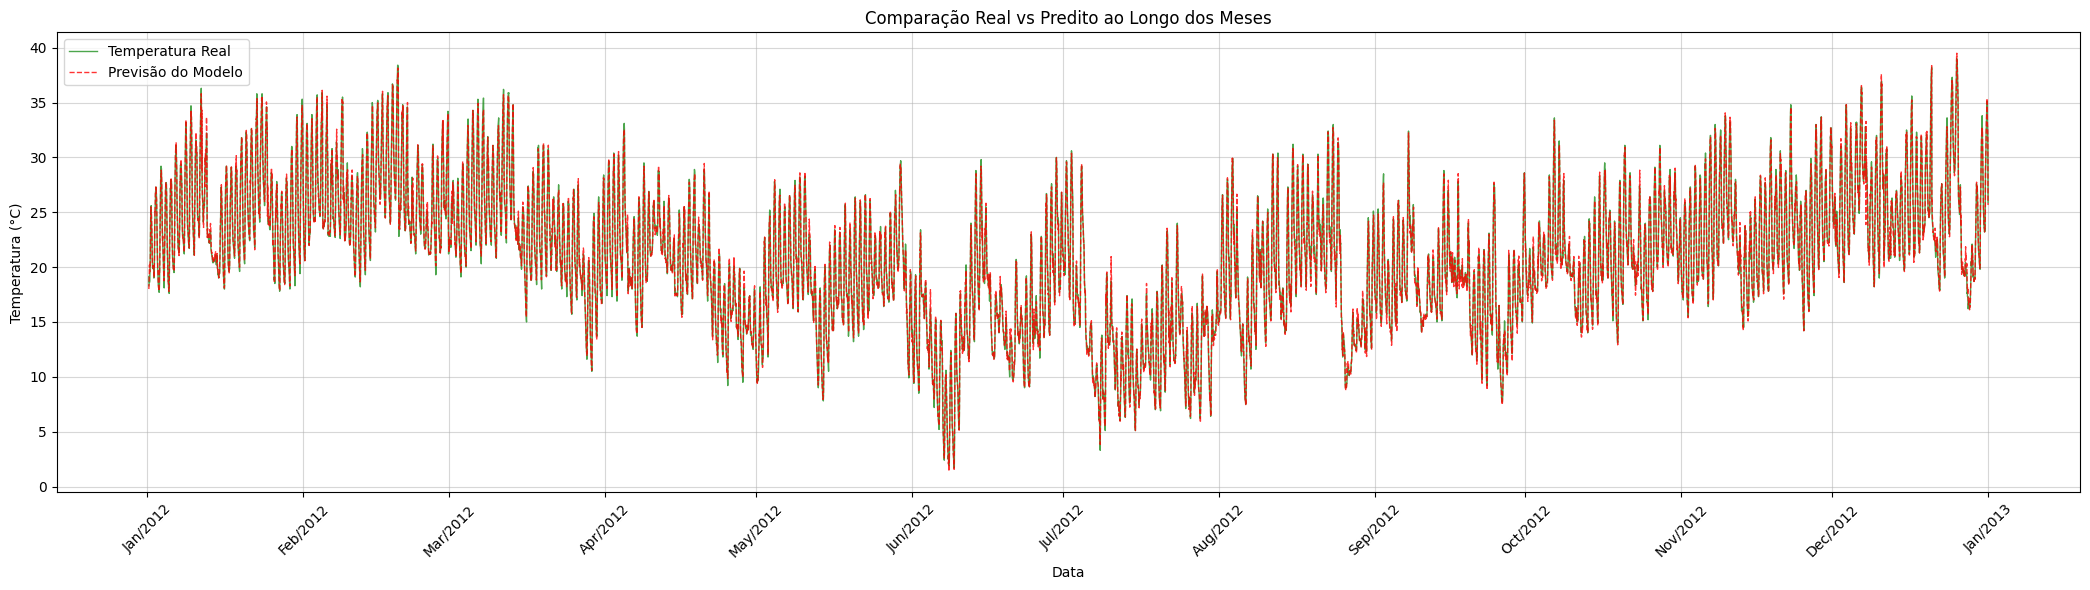

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. Recuperar as datas originais correspondentes às predições
# Lembre-se: O modelo "come" as primeiras X horas (sequence_length) para fazer a primeira predição.
# Então, as datas das predições começam a partir do índice [sequence_length] do dataframe original.

# Usar a sequence_length correta (que é a segunda dimensão de X_teste_ext)
prediction_sequence_length_multi_exogena = X_teste_ext_multi_exogena.shape[1]
datas_correspondentes_multi_exogena = temp_teste_multi_exogena.index[prediction_sequence_length_multi_exogena:]

# Vamos garantir que os tamanhos batem (segurança)
print(f"Tamanho das Datas: {len(datas_correspondentes_multi_exogena)}")
print(f"Tamanho das Predições: {len(predictions_ext_real_multi_exogena)}")

# 2. Criar um DataFrame temporário para facilitar a plotagem
df_resultado_multi_exogena = pd.DataFrame({
    'Real': y_teste_real_multi_exogena.flatten(),
    'Predito': predictions_ext_real_multi_exogena.flatten()
}, index=datas_correspondentes_multi_exogena)

# 3. Plotagem Formatada por Mês
fig, ax = plt.subplots(figsize=(21, 6))

ax.plot(df_resultado_multi_exogena.index, df_resultado_multi_exogena['Real'], label='Temperatura Real', color='green', linewidth=1, alpha=0.7)
ax.plot(df_resultado_multi_exogena.index, df_resultado_multi_exogena['Predito'], label='Previsão do Modelo', color='red', linewidth=1, alpha=0.8, linestyle='--')

# --- FORMATAÇÃO DO EIXO X (A Mágica acontece aqui) ---
# Define o formatador para mostrar o nome do mês (ex: Jan, Fev...)
ax.xaxis.set_major_locator(mdates.MonthLocator()) # Coloca um "tick" a cada mês
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y')) # Formato: "Jan/2022"

plt.title('Comparação Real vs Predito ao Longo dos Meses')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45) # Gira as datas para não encavalar
plt.tight_layout()
plt.show()

In [ ]:
#função para ver diferentes lags no treinamento e o resultado que eles tem no conjunto de teste externo

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

def train_and_evaluate_lstm(sequence_length, treino_combined_data, val_combined_data,teste_combined_data,  target_scaler):
    # 1. Create multivariate sequences
    X_train_final, y_train_final = create_multivariate_sequences(treino_combined_data, sequence_length)
    X_val_final, y_val_final = create_multivariate_sequences(val_combined_data, sequence_length)
    X_teste_ext, y_teste_ext = create_multivariate_sequences(teste_combined_data, sequence_length)

    # 2. Initialize EarlyStopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        mode='min',
        restore_best_weights=True
    )

    # 3. Define the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, activation='relu', return_sequences=False,
                   input_shape=(X_train_final.shape[1], X_train_final.shape[2])))
    model.add(Dense(units=1)) # Output: Scaled Temperature Prediction

    # 4. Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 5. Train the model
    history = model.fit(
        X_train_final,
        y_train_final,
        epochs=100,
        batch_size=32,
        verbose=0, # Suppress verbose output for cleaner iteration
        validation_data=(X_val_final, y_val_final),
        callbacks=[early_stopping]
    )

    # 6. Make predictions and inverse transform
    predictions_scaled = model.predict(X_teste_ext, verbose=0)
    predictions_real = target_scaler.inverse_transform(predictions_scaled)
    y_teste_real = target_scaler.inverse_transform(y_teste_ext.reshape(-1, 1))

    # 7. Calculate evaluation metrics
    mse = mean_squared_error(y_teste_real, predictions_real)
    mae = mean_absolute_error(y_teste_real, predictions_real)

    return model, mse, mae, history

# tunagem de parametros para modelo com exogenas date_time e físicas

In [6]:
#Divisão do dataset em treino e teste
temp_treino_multi_exogena = base[base.index.year == 2010]
treino_multi_exogena = temp_treino_multi_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']
temp_validacao_multi_exogena = base[base.index.year == 2011]
validacao_multi_exogena = temp_validacao_multi_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- FUNÇÃO AUXILIAR PARA CRIAR O TEMPO CÍCLICO ---
def adicionar_tempo_ciclico(df):
    df_copy = df.copy()

    # Se o índice não for datetime, converta-o (descomente a linha abaixo se necessário)
    # df_copy.index = pd.to_datetime(df_copy.index)

    # 1. Transformação da HORA (Ciclo Diário)
    # Permite ao modelo aprender ciclo dia/noite
    df_copy['hora_sin'] = np.sin(2 * np.pi * df_copy.index.hour / 24)
    df_copy['hora_cos'] = np.cos(2 * np.pi * df_copy.index.hour / 24)

    # 2. Transformação do DIA DO ANO (Ciclo Anual - Substitui Mês e Dia)
    # Permite ao modelo aprender Verão/Inverno de forma contínua
    df_copy['dia_ano_sin'] = np.sin(2 * np.pi * df_copy.index.dayofyear / 365.25)
    df_copy['dia_ano_cos'] = np.cos(2 * np.pi * df_copy.index.dayofyear / 365.25)

    return df_copy

# 1. Aplicar a transformação nos DataFrames
temp_treino_multi_exogena_proc = adicionar_tempo_ciclico(temp_treino_multi_exogena)
temp_validacao_multi_exogena_proc = adicionar_tempo_ciclico(temp_validacao_multi_exogena)

# 2. Defina as colunas
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'

exog_columns_datetime = ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']
exog_columns_fisicas = [
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, RAJADA MAXIMA (m/s)'
]

# 3. Extraia e escale APENAS a variável alvo (Temperatura)
treino_target_multi_exogena = temp_treino_multi_exogena_proc[target_column].values.reshape(-1, 1)
val_target_multi_exogena = temp_validacao_multi_exogena_proc[target_column].values.reshape(-1, 1)

target_scaler_multi_exogena = StandardScaler()
treino_target_scaled_multi_exogena = target_scaler_multi_exogena.fit_transform(treino_target_multi_exogena)
val_target_scaled_multi_exogena = target_scaler_multi_exogena.transform(val_target_multi_exogena)

# 4. Extraia as variáveis exógenas
treino_exog_datetime = temp_treino_multi_exogena_proc[exog_columns_datetime].values
val_exog_datetime = temp_validacao_multi_exogena_proc[exog_columns_datetime].values

treino_exog_fisicas = temp_treino_multi_exogena_proc[exog_columns_fisicas].values
val_exog_fisicas = temp_validacao_multi_exogena_proc[exog_columns_fisicas].values

# Scale the fisicas exogenous variables
fisicas_exog_scaler = StandardScaler()
treino_exog_fisicas_scaled = fisicas_exog_scaler.fit_transform(treino_exog_fisicas)
val_exog_fisicas_scaled = fisicas_exog_scaler.transform(val_exog_fisicas)

# Combine all scaled/prepared exogenous features
treino_multi_exogena = np.hstack((treino_exog_datetime, treino_exog_fisicas_scaled))
val_multi_exogena = np.hstack((val_exog_datetime, val_exog_fisicas_scaled))

print("Shape do Alvo Treino:", treino_target_scaled_multi_exogena.shape)
print("Shape das Exógenas Treino:", treino_multi_exogena.shape)
print("Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos, Físicas Escalonadas):\n", treino_multi_exogena[:2])

Shape do Alvo Treino: (8760, 1)
Shape das Exógenas Treino: (8760, 7)
Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos, Físicas Escalonadas):
 [[ 0.          1.          0.01720158  0.99985204  0.2219003  -0.51265948
   0.50632327]
 [ 0.25881905  0.96592583  0.01720158  0.99985204  0.25487144 -0.51265948
   0.73699887]]


In [9]:
import numpy as np

# 1. Combinar Temperatura (Escalada) com Tempo (Seno/Cosseno) e Exógenas Físicas Escaladas
# A estrutura será: [Temperatura, Hora_Sin, Hora_Cos, DiaAno_Sin, DiaAno_Cos, P_ATM, UMIDADE, VENTO_RAJADA]
treino_combined_data_multi_exogena = np.hstack((treino_target_scaled_multi_exogena, treino_multi_exogena))
val_combined_data_multi_exogena = np.hstack((val_target_scaled_multi_exogena, val_multi_exogena))

# 2. Verificar shapes
print("Shape final dos dados de treino:", treino_combined_data_multi_exogena.shape)
print("Shape final dos dados de validação:", val_combined_data_multi_exogena.shape)

# O resultado deve ter 8 colunas (1 alvo + 4 tempo + 3 físicas)
print("Primeiras 5 linhas do treino:\n", treino_combined_data_multi_exogena[:5])

Shape final dos dados de treino: (8760, 8)
Shape final dos dados de validação: (8760, 8)
Primeiras 5 linhas do treino:
 [[ 0.2735459   0.          1.          0.01720158  0.99985204  0.2219003
  -0.51265948  0.50632327]
 [ 0.18621411  0.25881905  0.96592583  0.01720158  0.99985204  0.25487144
  -0.51265948  0.73699887]
 [ 0.13381503  0.5         0.8660254   0.01720158  0.99985204  0.23838587
  -0.38035441  0.69855293]
 [ 0.08141596  0.70710678  0.70710678  0.01720158  0.99985204  0.20541473
  -0.31420188  0.62166107]
 [-0.00591583  0.8660254   0.5         0.01720158  0.99985204  0.09001573
  -0.18189681  0.23720175]]


In [10]:
import numpy as np

def create_multivariate_sequences(data, sequence_length):
    X, y = [], []
    # O loop para antes de estourar o array
    for i in range(len(data) - sequence_length):
        # X: Pega todas as colunas (Temp + Tempo) do passo atual até o tamanho da janela
        X.append(data[i:(i + sequence_length), :])

        # y: Pega APENAS a temperatura (coluna 0) do PRÓXIMO passo
        y.append(data[i + sequence_length, 0])

    return np.array(X), np.array(y)

sequence_length_multi_exogena = 8

# Criação das sequências
X_train_final_multi_exogena, y_train_final_multi_exogena = create_multivariate_sequences(treino_combined_data_multi_exogena, sequence_length_multi_exogena)
X_val_final_multi_exogena, y_val_final_multi_exogena = create_multivariate_sequences(val_combined_data_multi_exogena, sequence_length_multi_exogena)

print("Shape of X_train_final:", X_train_final_multi_exogena.shape) # Deve ser (N, sequence lenght, 1 ou 5)
print("Shape of y_train_final:", y_train_final_multi_exogena.shape) # Deve ser (N,)
print("Shape of X_val_final:", X_val_final_multi_exogena.shape)
print("Shape of y_val_final:", y_val_final_multi_exogena.shape)

Shape of X_train_final: (8752, 8, 8)
Shape of y_train_final: (8752,)
Shape of X_val_final: (8752, 8, 8)
Shape of y_val_final: (8752,)


In [12]:
# 2. Aplique EXATAMENTE a mesma função de engenharia de features usada no treino
# (A função adicionar_tempo_ciclico que criamos antes)
temp_teste_multi_exogena = base[base.index.year == 2012]
temp_teste_multi_exogena = adicionar_tempo_ciclico(temp_teste_multi_exogena)

# 3. Selecione as mesmas colunas
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
exog_columns_datetime = ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']
exog_columns_fisicas = [
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, RAJADA MAXIMA (m/s)'
]

# Verifique se não há NaNs (o shift ou cálculo pode gerar nulos nas pontas)
temp_teste_multi_exogena = temp_teste_multi_exogena.dropna()

In [13]:
# 1. Extrair a variável alvo do novo dataset
# Precisamos dela para comparar se o modelo acertou depois (y_true)
teste_target_multi_exogena = temp_teste_multi_exogena[target_column].values.reshape(-1, 1)

# 2. Extrair as exógenas (Seno/Cosseno)
teste_exog_datetime = temp_teste_multi_exogena[exog_columns_datetime].values
teste_exog_fisicas = temp_teste_multi_exogena[exog_columns_fisicas].values

teste_exog_fisicas_scaled = fisicas_exog_scaler.transform(teste_exog_fisicas)
teste_multi_exogena = np.hstack((teste_exog_datetime, teste_exog_fisicas_scaled))
# --- PONTO CRÍTICO DE SEGURANÇA ---
# Usamos .transform(), NÃO .fit_transform()
# Estamos dizendo: "Use a régua do treino para medir esses dados novos"
teste_target_scaled_multi_exogena = target_scaler_multi_exogena.transform(teste_target_multi_exogena)

# 3. Combinar (Target Escalado + Exógenas Cíclicas)
teste_combined_data_multi_exogena = np.hstack((teste_target_scaled_multi_exogena, teste_multi_exogena))
# teste_combined_data = teste_target_scaled
print("Shape dos dados de teste prontos:", teste_combined_data_multi_exogena.shape)

Shape dos dados de teste prontos: (8784, 8)


In [14]:
# 1. Criar as sequências (Janelas)
# Reutilizamos a função create_multivariate_sequences
X_teste_ext_multi_exogena, y_teste_ext_multi_exogena = create_multivariate_sequences(teste_combined_data_multi_exogena, sequence_length_multi_exogena)

print("Shape de entrada para o modelo:", X_teste_ext_multi_exogena.shape)

Shape de entrada para o modelo: (8776, 8, 8)


Reloading Tuner from tuner_logs_multi_exogena/lstm_tunning_multi_exogena/tuner0.json
>>> Iniciando Tunagem MULTI EXOGENA...

>>> MELHORES PARÂMETROS (MULTI EXOGENA):
- Camadas: 1
- Batch Size: 128
- Units: 160
- Learning Rate: 0.001
- Dropout: 0.1

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.3468 - val_loss: 0.0381
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0380 - val_loss: 0.0261
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0283 - val_loss: 0.0230
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0250 - val_loss: 0.0210
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0242 - val_loss: 0.0186
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0214 - val_loss: 0.0182
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0203 - val_loss: 0.0155
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0190 - val_loss: 0.0144
Epoch 9/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0

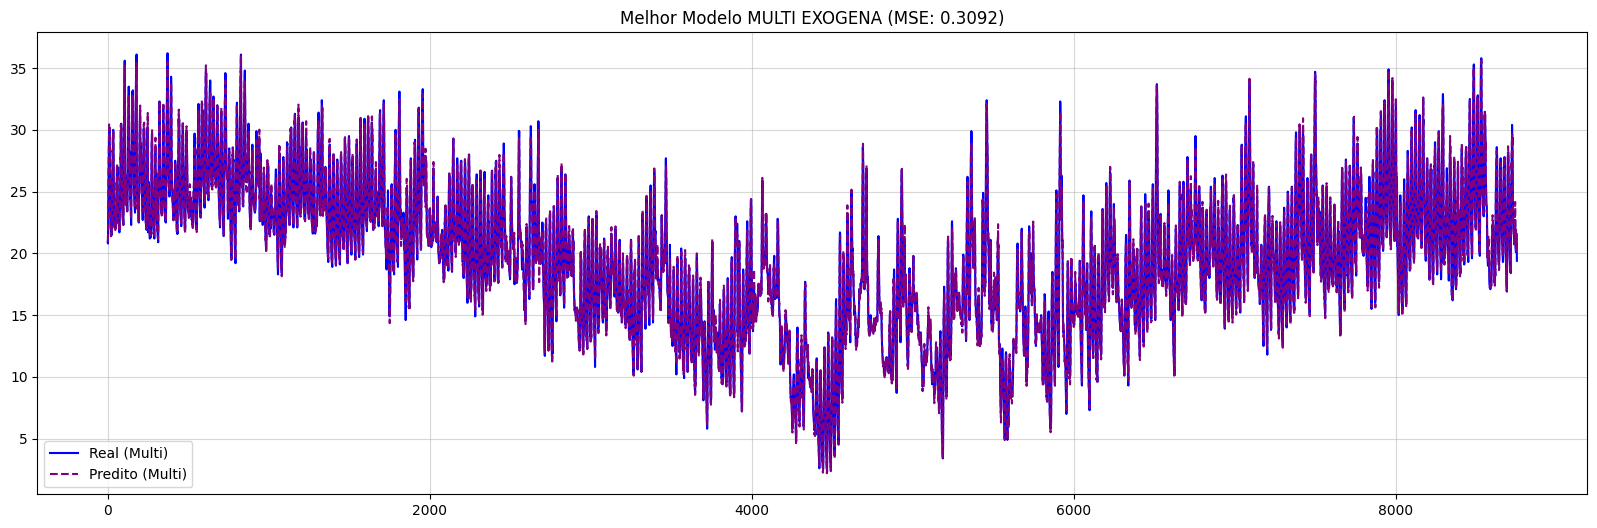

In [ ]:
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

# ==========================================
# 0. CONFIGURAÇÕES INICIAIS
# ==========================================

# Callback específico para o Tunning deste modelo
early_stopping_tunning_multi = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    restore_best_weights=True
)

# ==========================================
# 1. CONSTRUÇÃO DO MODELO (MULTI EXOGENA)
# ==========================================

def build_model_multi_exogena(hp):
    model = Sequential()

    # --- Hiperparâmetros ---
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)

    hp_layers = hp.Int('num_layers', 1, 3)

    # Usa o shape do seu dataset multi exogena
    input_shape = (X_train_final_multi_exogena.shape[1], X_train_final_multi_exogena.shape[2])

    for i in range(hp_layers):
        is_last_layer = (i == hp_layers - 1)

        model.add(LSTM(
            units=hp_units,
            activation='relu',
            return_sequences=not is_last_layer,
            input_shape=input_shape if i == 0 else None
        ))

        model.add(Dropout(hp_dropout))

    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=hp_lr),
                  loss='mean_squared_error')

    return model

# ==========================================
# 2. TUNER PERSONALIZADO (MULTI EXOGENA)
# ==========================================

class MyTunerMultiExogena(kt.RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        kwargs['batch_size'] = trial.hyperparameters.Choice('batch_size', values=[16, 32, 64, 128])
        return super(MyTunerMultiExogena, self).run_trial(trial, *args, **kwargs)

# ==========================================
# 3. EXECUTANDO A BUSCA (ISOLADA)
# ==========================================

early_stopping_final = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

# Configura o Tuner com diretórios e nomes ÚNICOS para não misturar
tuner_multi = MyTunerMultiExogena(
    build_model_multi_exogena,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=1,
    directory='tuner_logs_multi_exogena',        # <--- Pasta EXCLUSIVA
    project_name='lstm_tunning_multi_exogena',   # <--- Projeto EXCLUSIVO
    overwrite=False
)

print(">>> Iniciando Tunagem MULTI EXOGENA...")

tuner_multi.search(
    X_train_final_multi_exogena,
    y_train_final_multi_exogena,
    epochs=50,
    validation_data=(X_val_final_multi_exogena, y_val_final_multi_exogena),
    callbacks=[early_stopping_tunning_multi],
    verbose=1
)

# ==========================================
# 4. RECUPERANDO E TREINANDO O FINAL
# ==========================================

best_hps_multi = tuner_multi.get_best_hyperparameters()[0]
best_batch_size_multi = best_hps_multi.get('batch_size')

print(f"""
>>> MELHORES PARÂMETROS (MULTI EXOGENA):
- Camadas: {best_hps_multi.get('num_layers')}
- Batch Size: {best_batch_size_multi}
- Units: {best_hps_multi.get('units')}
- Learning Rate: {best_hps_multi.get('learning_rate')}
- Dropout: {best_hps_multi.get('dropout')}
""")

# Constrói o modelo final
best_model_multi_exogena = tuner_multi.hypermodel.build(best_hps_multi)

# Treina o modelo final
history_multi = best_model_multi_exogena.fit(
    X_train_final_multi_exogena,
    y_train_final_multi_exogena,
    epochs=100,
    batch_size=best_batch_size_multi,
    validation_data=(X_val_final_multi_exogena, y_val_final_multi_exogena),
    callbacks=[early_stopping_final],
    verbose=1
)

# ==========================================
# 5. VISUALIZAÇÃO
# ==========================================

predictions_scaled_multi = best_model_multi_exogena.predict(X_val_final_multi_exogena)

# ATENÇÃO: Verifique se o nome do seu scaler é este mesmo (target_scaler_multi_exogena)
# ou se você está usando o antigo 'target_scaler_com_exogena'. Ajuste se necessário.
predictions_real_multi = target_scaler_multi_exogena.inverse_transform(predictions_scaled_multi)
y_val_real_multi = target_scaler_multi_exogena.inverse_transform(y_val_final_multi_exogena.reshape(-1, 1))

mse_val_multi = mean_squared_error(y_val_real_multi, predictions_real_multi)

plt.figure(figsize=(20, 6))
plt.plot(y_val_real_multi[:10000], label='Real (Multi)', color='blue')
plt.plot(predictions_real_multi[:10000], label='Predito (Multi)', color='purple', linestyle='--')
plt.title(f'Melhor Modelo MULTI EXOGENA (MSE: {mse_val_multi:.4f})')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


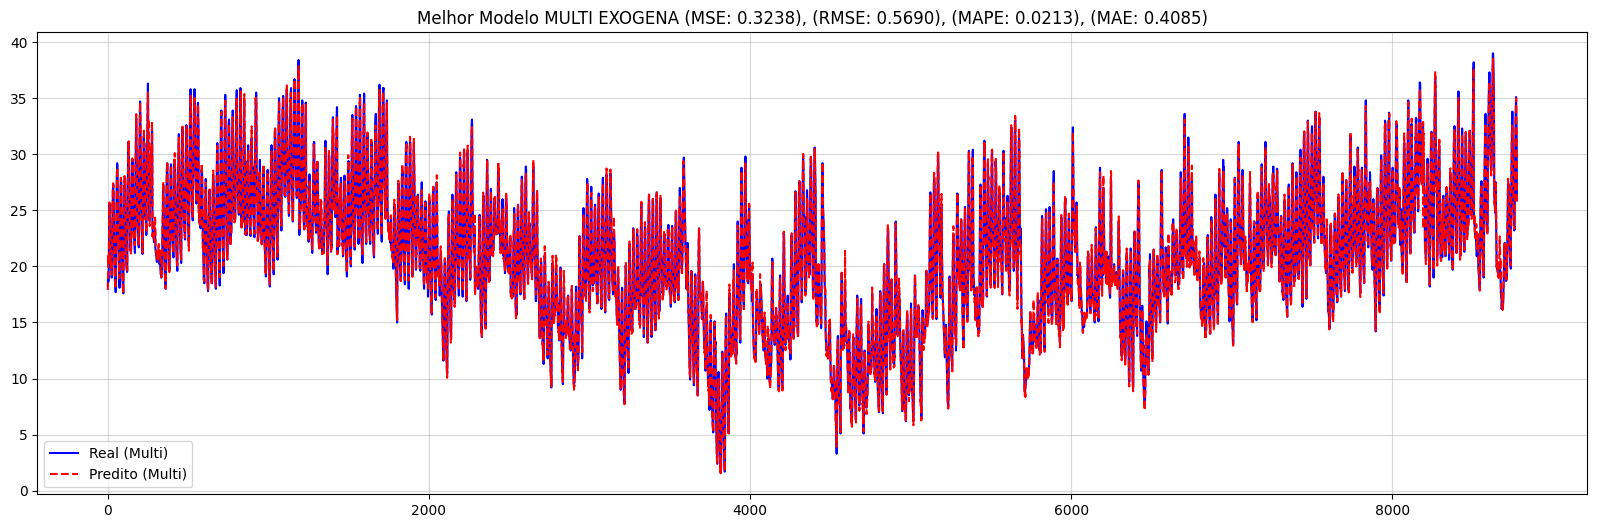

In [ ]:
# ==========================================
# 5. VISUALIZAÇÃO
# ==========================================

predictions_scaled_multi = best_model_multi_exogena.predict(X_teste_ext_multi_exogena)

# ATENÇÃO: Verifique se o nome do seu scaler é este mesmo (target_scaler_multi_exogena)
# ou se você está usando o antigo 'target_scaler_com_exogena'. Ajuste se necessário.
predictions_real_multi = target_scaler_multi_exogena.inverse_transform(predictions_scaled_multi)
y_val_real_multi = target_scaler_multi_exogena.inverse_transform(y_teste_ext_multi_exogena.reshape(-1, 1))

mse_val_multi = mean_squared_error(y_val_real_multi, predictions_real_multi)
mae_val_multi = mean_absolute_error(y_val_real_multi, predictions_real_multi)
rmse_val_multi = root_mean_squared_error(y_val_real_multi, predictions_real_multi)
mape_val_multi = mean_absolute_percentage_error(y_val_real_multi, predictions_real_multi)

plt.figure(figsize=(20, 6))
plt.plot(y_val_real_multi[:10000], label='Real (Multi)', color='blue')
plt.plot(predictions_real_multi[:10000], label='Predito (Multi)', color='red', linestyle='--')
plt.title(f'Melhor Modelo MULTI EXOGENA (MSE: {mse_val_multi:.4f}), (RMSE: {rmse_val_multi:.4f}), (MAPE: {mape_val_multi:.4f}), (MAE: {mae_val_multi:.4f})')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()
